In [1]:
import cv2 ### pip install opencv-python Shift + enter
## pip install opencv-contrib-python  fullpackage

In [8]:
from deepface import DeepFace ## pip install deepface

In [2]:
img = cv2.imread('Happyboy.jpg')

In [3]:
import matplotlib.pyplot as plt

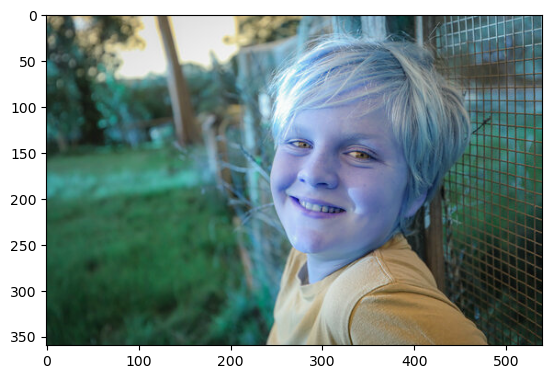

In [4]:
plt.imshow(img)  ## BGR

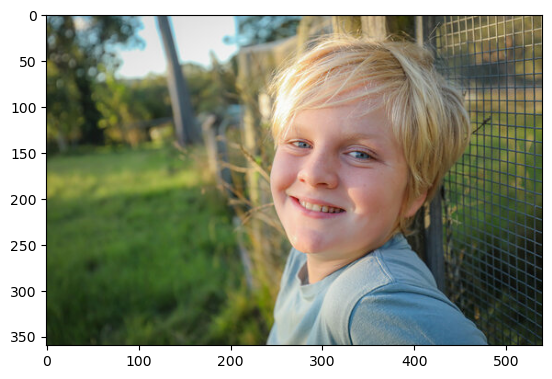

In [5]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [9]:
predictions = DeepFace.analyze(img)

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: C:\Users\sebas\.deepface\weights\facial_expression_model_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████| 5.98M/5.98M [00:00<00:00, 6.79MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: C:\Users\sebas\.deepface\weights\age_model_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████| 539M/539M [00:31<00:00, 16.9MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: C:\Users\sebas\.deepface\weights\gender_model_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████| 537M/537M [00:35<00:00, 15.0MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: C:\Users\sebas\.deepface\weights\race_model_single_batch.h5
100%|███████████████████████████████████████████████████████████████████████████████| 537M/537M [00:36<00:00, 14.8MB/s]
Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 146ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:01<00:03,  1.22s/it]

1/1 [==============================] - 1s 716ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:02<00:01,  1.03it/s]

1/1 [==============================] - 1s 768ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:02<00:00,  1.11it/s]

1/1 [==============================] - 1s 789ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.09it/s]


In [10]:
predictions

{'emotion': {'angry': 0.10056844912469387,
  'disgust': 7.131730939136105e-06,
  'fear': 95.17186284065247,
  'happy': 2.6058239862322807,
  'sad': 0.047647685278207064,
  'surprise': 2.0649254322052,
  'neutral': 0.00916644130484201},
 'dominant_emotion': 'fear',
 'region': {'x': 226, 'y': 89, 'w': 148, 'h': 148},
 'age': 33,
 'gender': 'Man',
 'race': {'asian': 7.97271674546203,
  'indian': 33.65748031824592,
  'black': 4.421784510825218,
  'white': 15.455940718166914,
  'middle eastern': 15.641935544244712,
  'latino hispanic': 22.850148123520388},
 'dominant_race': 'indian'}

In [11]:
type(predictions)

dict

In [12]:
predictions['dominant_emotion']

'fear'

# Rectangle across the face

In [14]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
     #print(faceCascade.empty())
faces = faceCascade.detectMultiScale(gray,1.1,4) 

    # Draw a rectangle around faces
for(x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

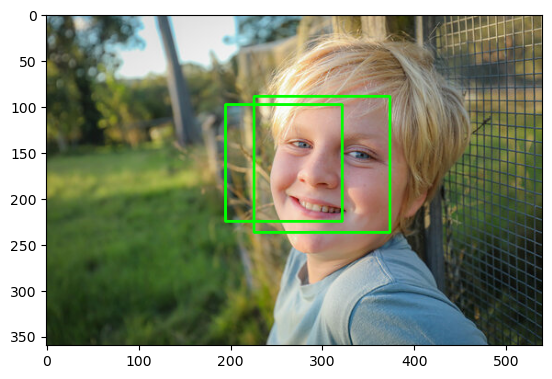

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [18]:
font = cv2.FONT_HERSHEY_SIMPLEX

    # Using putText() method for inserting a text on a video
cv2.putText(img,
                 predictions['dominant_emotion'],
                 (50, 50),
                 font, 1, 
                 (0, 0, 255),
                  2, 
                  cv2.LINE_4) ;

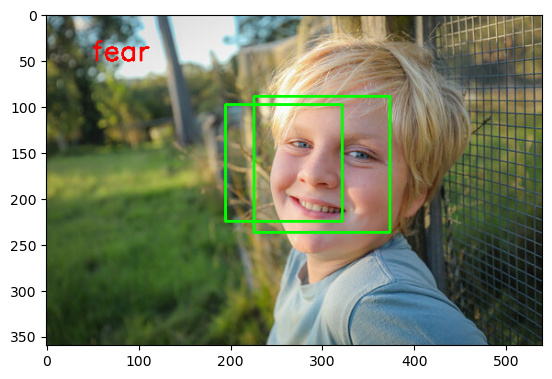

In [19]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [3]:
import cv2 ### pip install opencv-python

from deepface import DeepFace ## pip install deepface

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("No se puede abrir la camara web")
    
while True:
    ret,frame = cap.read()
    result = DeepFace.analyze(frame, actions = ['emotion'])
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    for(x, y, w, h) in faces:
        cv2.rectangle(frame,(x, y), (x+w, y+h), (0,255,0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(frame,
                result['dominant_emotion'],
                (50,50),
                font, 3,
                (0, 0, 255),
                2,
                cv2.LINE_4)
    cv2.imshow('Original video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

TypeError: object of type 'NoneType' has no len()